In [2]:
from keras.models import load_model

Using TensorFlow backend.


In [4]:
model = load_model("./baseline_cnn.h5")

In [9]:
import tensorflow as tf
import keras
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

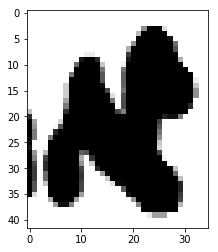

In [22]:
plt.imshow(img,cmap="gray")

In [19]:
def reshape_image(img,size):
    shape = np.shape(img)
    new_shape = (shape/np.max(shape)*size).astype(int)
    img = cv2.resize(img, dsize=tuple(new_shape), interpolation=cv2.INTER_AREA)
                
    delta_h = size - new_shape[1]
    delta_w = size - new_shape[0]
                
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
                
    color = 255
                
    new_img = cv2.copyMakeBorder(img,top,bottom,left,right,cv2.BORDER_CONSTANT,value=color)
    
    return new_img

In [ ]:
def preprocess_image(img):
    new_image = reshape_image(img,28)
    new_image = new_image.reshape(1, 28, 28, 1)
    new_image /= 255
    
    return new_image

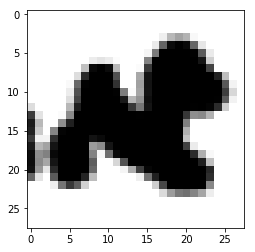

In [24]:
plt.imshow(new_image,cmap = "gray")

In [36]:
p = model.predict_proba(new_image)

In [40]:
for pi in p[0]:
    print(pi)

0.999998
7.33159e-07
3.28288e-10
1.91892e-10
1.13671e-06
1.09037e-12
1.34354e-10
1.03159e-11
1.21033e-12
2.62269e-12
9.97378e-14
9.54705e-14
1.06204e-11
1.86499e-11
1.60645e-12
4.33933e-14
1.30152e-12
1.57911e-09
6.84763e-11
1.98129e-12
6.40134e-12
3.68796e-11
5.17445e-12
4.92125e-11
1.94665e-11
1.51606e-10
4.80197e-13


In [43]:
import sys
print("Number of arguments:", len(sys.argv), "arguments")
print("Argument List:", str(sys.argv))

img = np.double(cv2.imread("sys.argv[0]",0))

Number of arguments: 3 arguments
Argument List: ['/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '-f', '/Users/Karlsson/Library/Jupyter/runtime/kernel-a66f308e-c6f7-46f3-8ac3-3b5730af8560.json']
